# **Daegu Apartments**

**Table of content :**

1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis
4. Data Preparation
5. Modeling
6. Conclusion and Recommendation

****

## **Business Understanding**

### **Context:**

Daegu merupakan kota di Utara Provinsi Gyeongsang, Korea Selatan. Berdasarkan data [Daegu Metropolitan City](https://www.daegu.go.kr/english/index.do?menu_id=00939612), per Desember 2021 adalah 2.4 juta jiwa. Terbatasnya lahan dan padat nya aktifitas bisnis di `kawasan perkotaan` membuat masyarakat di perkotaan tidak mudah dalam memiliki hunian. Apartements merupakan alternatif yang dipilih masyarakat untuk memiliki hunian tersebut.

Individu atau perusahaan dapat berperan sebagai penjual dan melakukan penawaran penjualan unit. Penjual dapat menjual unit-unit yang dimiliki pada platform dengan menentukan sendiri `harga per sqft unit` yang dikehendaki. 

### **Stakeholder:**

Pada project ini stakeholder adalah Apartment Owners (individu atau perusahaan) ingin menjual unit apartment mereka. 

### **Problem Statement:**

Dari penjelasan di atas, maka pernyataan masalah adalah:

* `Begaimana menentukan harga jual (per sqft) yang memberikan profit optimal:` Metode yang ada saat ini hanya berdasarkan estimasi intuisi dari pengalaman penjual dalam memberikan harga, yang cenderung tidak memberikan profit yang optimal ketika harga jual rendah dan sulit terjual ketika harga jual terlalu tinggi.

### **Goals:**

Sebagai Data Scientist kami akan membantu dalam pembuatan `Predictive Model` untuk `Memprediksi harga jual unit (per sqft) yang memberikan profit optimal`.

Sehingga, ada beberapa pertanyaan yang perlu dijawab terlebih dahulu: 

1. Platform, apa dan bagaimana skema pembagiannya?.
2. Harga pasaran, berapa harga pasaran per unit di kawasan 'Daegu' Apartmen?.

### **Analytical Approach:**

Berikut tahapan analisis yang akan kami lakukan:

* __Step-1:__ Melakukan Exploratatory Data Analyst (EDA) untuk mendapatkan gmabaran karakteristik unit apartment yang terjual.
* __Step-2:__ Membangun model regressi untuk memperdiksi harga jual yang berdasarkan data sehingga dapat mengoptimalkan profit.
* __Step-3:__ Mengidentifikasi faktor apa saja yang membuat harga jual suatu unit apartment meningkat atau menurun.
* __Step-4:__ Mensimulasikan bagaimana hasil prediksi dapat membantu mengoptimalkan penjualan suatu unit apartment. 

### **Metrics:**
Mean Absolute Error (MAE) dan R-squared (R2) sebagai metrik untuk mengetahui kemampuan model dalam memprediksi harga jual unit apartment di kota Daegu, South Korea. 


## **Data Understanding**

### **About the Dataset**
Dataset Daegu Apartment ini terkait dengan harga jual sebuah unit apartment di Kota Daegu. Dataset ini terdiri dari 4123 baris dan 11 kolom. 

### **Data Attribute: Target & Feature**

Tujuan utama dalam pengembangan machine learning ini adalah untuk memprediksi harga jual unit apartment di Kota Daegu.

| Feature | Tipe Data | Deskripsi |
| --- | --- | --- |
| SalePrice | int64 | Harga unit apartment (per sqft) (Won) |

Fitur dalam machine learning merujuk pada atribut-atribut atau variabel-variabel yang digunakan untuk melatih model dan membuat prediksi. Fitur-fitur ini mewakili karakteristik atau informasi yang relevan untuk prediksi harga jual unit apartment. Fitur ini mencakup informasi tentang **Profil Unit**, **Profil Apartment**, **Profil Sekitar Apartment**. 

**Profil Unit**

| Feature | Tipe Data | Deskripsi |
| --- | --- | --- |
| Size(sqft) | Integer | ukuran unit apartment (in square feet) |
| Floor | Integer | Lantai berapa unit berada |
| HeatingType | Object | Tipe pemanas di ruangan |

**Profil Apartment**

| Feature | Tipe Data | Deskripsi |
| --- | --- | --- |
| Hallway Type | Object | Jenis lantai lorong |
| YearBuilt | Integer | Tahun dibuat |
| N_FacilitiesInApt | Integer | Jumlah fasilitas di bangunan apartment |
| N_Parkinglot(Basement) | Integer | Jumlah parkiran di basement |
| AptManageType | Object | Tipe management apartment |

**Profil Sekitar Apartment**

| Feature | Tipe Data | Deskripsi |
| --- | --- | --- |
| N_FacilitiesNearBy(ETC) | Integer | Jumlah fasilitas terdekat |
| N_FacilitiesNearBy(PublicOffice) | Integer | Jumlah perkantoran terdekat |
| N_SchoolNearBy(University) | Integer | Jumlah universitas terdekat|
| N_SchoolNearBy(ETC) | Integer | Jumlah sekolah dasar terdekat |
| N_FacilitiesNearBy(Park) | Integer | Jumlah taman terdekat |
| N_FacilitiesNearBy(Dpartmentstore) | Integer | Jumlah dpartmentstore terdekat |
| N_FacilitiesNearBy(Hospital) | Integer | Jumlah rumah sakit terdekat |
| TimeToSubway | Object | Waktu ke subway terdekat |
| TimeToBusStop | Object | Waktu ke Bus stop terdekat |
| SubwayStation | Object | Subway station terdekat |

**Scale of Measurement**

Sebelum melakukan proses lain, penting untuk memahami tipe data yang terkait dengan setiap kolom. Di bawah ini adalah tabel yang mengilustrasikan tipe data bersama dengan kolom yang sesuai:

| Tipe | Feature |
| --- | --- |
| Discrete  | SalePrice, Size(sqf), N_FacilitiesInApt, YearBuilt, N_Parkinglot(Basement), N_SchoolNearBy(University), N_FacilitiesNearBy(PublicOffice), N_FacilitiesNearBy(ETC), Floor, N_SchoolNearBy(Elementary), N_FacilitiesNearBy(Park), N_FacilitiesNearBy(Dpartmentstore), N_FacilitiesNearBy(Hospital)  |
| Object   | SubwayStation, HallwayType, TimeToSubway, AptManageType, HeatingType	|

## Data Preparation

Pada tahap ini kita akan mempersiapkan data yang akan digunakan untuk melatih machine learning model / Predictive Model yang akan kita bangun.

### Load Dataset

Kita melakukan penambahan data dari dataset yang kita ambil dari kaggle, untuk pemilihan fitur mana yang akan diambil akan kita lakukan teknik ANOVA (One-way) untuk ekstraksi categorical features dan R2 untuk ekstraksi numerical features.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df_kaggel = pd.read_csv("Daegu_Real_Estate_data.csv")
df_pwd = pd.read_csv("data_daegu_apartment.csv")

In [93]:
print(f"Duplicate kaggle: {df_kaggel.duplicated().sum()} atau {round(df_kaggel.duplicated().sum()/len(df_kaggel)*100)}%")
print(f"Duplicate pwd: {df_pwd.duplicated().sum()} atau {round(df_pwd.duplicated().sum()/len(df_pwd)*100)}%")

Duplicate kaggle: 316 atau 5%
Duplicate pwd: 1422 atau 34%


In [94]:
df_kaggel.drop_duplicates(inplace=True)
df_pwd.drop_duplicates(inplace=True)

In [95]:
print("Setelah Drop :")
print(f"Duplicate kaggle: {df_kaggel.duplicated().sum()} atau {round(df_kaggel.duplicated().sum()/len(df_kaggel)*100)}%")
print(f"Duplicate pwd: {df_pwd.duplicated().sum()} atau {round(df_pwd.duplicated().sum()/len(df_pwd)*100)}%")

Setelah Drop :
Duplicate kaggle: 0 atau 0%
Duplicate pwd: 0 atau 0%


In [96]:
df_pwd

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


In [97]:
df_kaggel

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


#### Perbandingan 2 dataset diatas

* Original dataset memiliki : 2701 rows × 11 columns
* Additional dataset memiliki : 5575 rows × 30 columns

### **Relationship Analysis : Menggunakan domain knowledge dan R2 untuk memilih numerical variable**

Pada analisis ini kita akan menggunakan :
1. `Scatter Plot` untuk mengetahui bagaimana hubungan antara **Numerical features** dengan **target variable (SalePrice)**.
2. Kita akan menggunakan `Coefficient Determinant/R-squared` mengetahui kekuatan hubungan dari setiap **Numerical features** terhadap **target variable (SalePrice)**.

Melanjutkan hasil `correlation` sebelumnya yang mengukur `kekuatan/strength` dari hubungan **Independent Variable** dan **Dependent Variable**, `R-squared` sebagai alat statistik membantu kita dalam mengukur seberapa banyak `variasi` dari **Independent Variable** dapat dijelaskan oleh **Dependent variable** [R-Squared: Definition, Calculation Formula, Uses, and Limitations](https://www.investopedia.com/terms/r/r-squared.asp) dan [R-squared statquest](https://www.youtube.com/watch?v=bMccdk8EdGo)

**Coefficient Determinant Formula :**
$${R}^2 = (\frac{UnexplainedVariation}{TotalVariation})$$

$${R}^2 = (\frac{Var(mean)-Var(line)}{Var(mean)})$$ 

**where**: 

- $Var(mean)$ : Variance dari mean fitur independent.
- $Var(line)$ : Variance dari fit line. 

In [98]:
# Select only numerical columns
numerical_df = df_kaggel.select_dtypes(include=['number'])

# Convert the column names to a list of strings
numerical_columns_list = numerical_df.columns.tolist()

R^2 vlues:
SalePrice: 1.0000
Size(sqf): 0.4688
N_FacilitiesInApt: 0.2975
N_Parkinglot(Basement): 0.2737
YearBuilt: 0.2473
N_FacilitiesNearBy(PublicOffice): 0.2084
N_FacilitiesNearBy(ETC): 0.2007
N_FacilitiesNearBy(Total): 0.1746
N_SchoolNearBy(University): 0.1546
YrSold: 0.1463
N_SchoolNearBy(High): 0.1384
N_SchoolNearBy(Total): 0.1349
N_manager: 0.1328
Floor: 0.1184
N_SchoolNearBy(Elementary): 0.1124
N_FacilitiesNearBy(Park): 0.0949
N_FacilitiesNearBy(Dpartmentstore): 0.0779
N_FacilitiesNearBy(Hospital): 0.0622
N_APT: 0.0404
N_elevators: 0.0363
N_Parkinglot(Ground): 0.0289
N_SchoolNearBy(Middle): 0.0208
N_FacilitiesNearBy(Mall): 0.0076
MonthSold: 0.0020


c:\Users\Fariz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


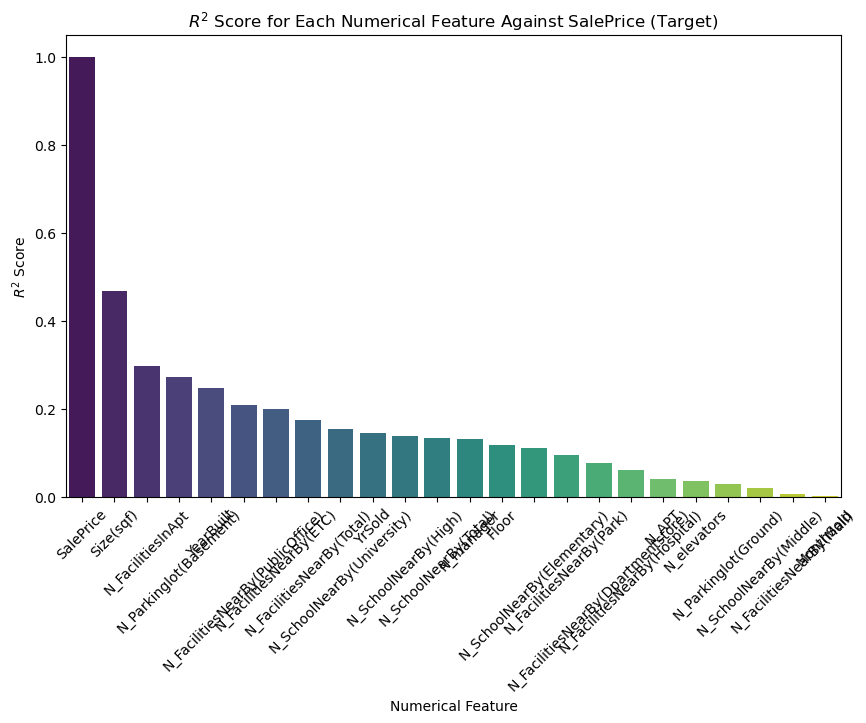

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize a dictionary to store R^2 values for each numerical feature
r2_scores = {}

# Fit linear regression models and calculate R^2 for each numerical feature
for feature in numerical_columns_list:
    X = df_kaggel[[feature]]
    y = df_kaggel['SalePrice']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    r2_scores[feature] = r2

# Sort R^2 values in descending order
sorted_r2_scores = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Print and visualize R^2 values
print("R^2 vlues:")
for feature, r2 in sorted_r2_scores:
    print(f"{feature}: {r2:.4f}")

# Plot sorted R^2 values
plt.figure(figsize=(10, 6))
sns.barplot(x=[f[0] for f in sorted_r2_scores], y=[f[   1] for f in sorted_r2_scores], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Numerical Feature')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ Score for Each Numerical Feature Against SalePrice (Target)')
plt.show() 

### Menggunakan **ANOVA (Analysis of Variance)**

ANOVA dapat digunakan untuk menentukan apakah ada secara statistik perbedaas signifikan antara rata-rata grup yang berbeda pada **categorical variable**. Interpretasi hasil sebagai berikut:

* One-Way ANOVA: If you have one categorical independent variable.
* Two-Way ANOVA: If you have two categorical independent variables and want to consider their interaction as well.

Sehingga, karena kita tidak ingin consider interaksi, kita hanya perlu gunakan **One-Way ANOVA**

In [100]:
# Select only numerical columns
category_df = df_kaggel.select_dtypes(include=['object'])

# Convert the column names to a list of strings
category_columns_list = category_df.columns.tolist()
category_columns_list

['HallwayType',
 'HeatingType',
 'AptManageType',
 'TimeToBusStop',
 'TimeToSubway',
 'SubwayStation']

#### Penjelasan `ANOVA Table` :
* sum_sq: Sum of squares (between groups and within groups).
* df: Degrees of freedom.
* F: F-statistic.
* PR(>F): p-value of the F-statistic.

If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis that the group means are equal, indicating a significant difference between the groups.

In [101]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [102]:
for feature in category_columns_list:
    data = {
        feature : df_kaggel[feature].values,
        'SalePrice': df_kaggel['SalePrice'].values
    }

    df = pd.DataFrame(data)

    # Define the model
    model = ols(f'SalePrice ~ C({feature})', data=df).fit()

    # Perform ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Print the results
    print(anova_table)
    print()

                      sum_sq      df            F  PR(>F)
C(HallwayType)  2.914251e+13     2.0  2390.194847     0.0
Residual        3.396838e+13  5572.0          NaN     NaN

                      sum_sq      df          F    PR(>F)
C(HeatingType)  1.270541e+11     1.0  11.242127  0.000805
Residual        6.298384e+13  5573.0        NaN       NaN

                        sum_sq      df           F        PR(>F)
C(AptManageType)  4.232898e+12     1.0  400.658023  3.961840e-86
Residual          5.887799e+13  5573.0         NaN           NaN

                        sum_sq      df          F         PR(>F)
C(TimeToBusStop)  5.296384e+12     2.0  255.22532  8.789927e-107
Residual          5.781451e+13  5572.0        NaN            NaN

                       sum_sq      df           F  PR(>F)
C(TimeToSubway)  2.431000e+13     4.0  872.446102     0.0
Residual         3.880088e+13  5570.0         NaN     NaN

                        sum_sq      df           F  PR(>F)
C(SubwayStation)  1.6851

#### Hasil penentuan ekstraksi numerical dan categorical feature :

* Numerical feature yang diambil : 
    * N_FacilitiesNearBy(Hospital)
    * N_FacilitiesNearBy(Dpartmentstore)
    * N_FacilitiesNearBy(Park)
    * N_SchoolNearBy(Elementary)
    * Floor
* Categorical feature yang diambil :
    * TimeToBusStop
    * HeatingType
    * AptManageType

### **Proses Merging dan Ekstraksi Fitur yang dibutuhkan**

In [103]:
# Merge the dataframes on semua columns 
merged_df = pd.merge(df_pwd, df_kaggel, on=df_pwd.columns.tolist(), how='left')

needed_feature = [
    'SubwayStation',
    'TimeToSubway',
    'TimeToBusStop',
    'N_FacilitiesNearBy(Hospital)',
    'N_FacilitiesNearBy(Dpartmentstore)',
    'N_FacilitiesNearBy(Park)',
    'N_FacilitiesNearBy(ETC)',
    'N_FacilitiesNearBy(PublicOffice)',
    'N_SchoolNearBy(University)',
    'N_Parkinglot(Basement)',
    'N_SchoolNearBy(Elementary)',
    'HallwayType',
    'Floor',
    'YearBuilt',
    'N_FacilitiesInApt',
    'HeatingType',
    'AptManageType',
    'Size(sqf)',
    'SalePrice']
# Now merged_df contains all columns from df_pwd and the 'HeatingType' column from df_kaggle
merge = merged_df[needed_feature]
merge

,SubwayStation,TimeToSubway,TimeToBusStop,N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Park),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_SchoolNearBy(Elementary),HallwayType,Floor,YearBuilt,N_FacilitiesInApt,HeatingType,AptManageType,Size(sqf),SalePrice
0,Kyungbuk_uni_hospital,0-5min,0~5min,1,2.0,2.0,0.0,3.0,2.0,1270.0,3.0,terraced,28,2007,10,individual_heating,management_in_trust,1387,346017
1,Kyungbuk_uni_hospital,0-5min,0~5min,1,2.0,2.0,0.0,3.0,2.0,1270.0,3.0,terraced,17,2007,10,individual_heating,management_in_trust,1387,346017
2,Kyungbuk_uni_hospital,0-5min,0~5min,1,2.0,2.0,0.0,3.0,2.0,1270.0,3.0,terraced,26,2007,10,individual_heating,management_in_trust,1387,346017
3,Kyungbuk_uni_hospital,0-5min,0~5min,1,2.0,2.0,0.0,3.0,2.0,1270.0,3.0,terraced,26,2007,10,individual_heating,management_in_trust,1387,346017
4,Kyungbuk_uni_hospital,0-5min,0~5min,1,2.0,2.0,0.0,3.0,2.0,1270.0,3.0,terraced,20,2007,10,individual_heating,management_in_trust,1387,346017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,Myung-duk,15min~20min,0~5min,2,0.0,0.0,5.0,6.0,5.0,536.0,4.0,mixed,7,1993,4,individual_heating,management_in_trust,1761,345132
4650,Sin-nam,0-5min,5min~10min,1,1.0,1.0,0.0,3.0,2.0,475.0,2.0,terraced,14,2008,8,individual_heating,management_in_trust,914,323008
4651,Sin-nam,0-5min,5min~10min,1,1.0,1.0,0.0,3.0,2.0,475.0,2.0,terraced,4,2008,8,individual_heating,management_in_trust,914,323008
4652,Myung-duk,15min~20min,0~5min,2,0.0,0.0,5.0,6.0,5.0,536.0,4.0,mixed,14,1993,4,individual_heating,management_in_trust,1451,242477


In [104]:
merge.duplicated().sum()

261

In [105]:
merge.drop_duplicates(inplace=True)

C:\Users\Fariz\AppData\Local\Temp\ipykernel_17052\1819331503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge.drop_duplicates(inplace=True)


In [106]:
merge.duplicated().sum()

0

In [107]:
merge.isna().sum()

SubwayStation                         0
TimeToSubway                          0
TimeToBusStop                         0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Park)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(PublicOffice)      0
N_SchoolNearBy(University)            0
N_Parkinglot(Basement)                0
N_SchoolNearBy(Elementary)            0
HallwayType                           0
Floor                                 0
YearBuilt                             0
N_FacilitiesInApt                     0
HeatingType                           0
AptManageType                         0
Size(sqf)                             0
SalePrice                             0
dtype: int64

#### **Hasil Proses Merging and Ektraksi** :

Setelah Merging kita pastikan tidak ada duplicate serta missing value.

In [108]:
merge

,SubwayStation,TimeToSubway,TimeToBusStop,N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Park),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_SchoolNearBy(Elementary),HallwayType,Floor,YearBuilt,N_FacilitiesInApt,HeatingType,AptManageType,Size(sqf),SalePrice
0,Kyungbuk_uni_hospital,0-5min,0~5min,1,2.0,2.0,0.0,3.0,2.0,1270.0,3.0,terraced,28,2007,10,individual_heating,management_in_trust,1387,346017
1,Kyungbuk_uni_hospital,0-5min,0~5min,1,2.0,2.0,0.0,3.0,2.0,1270.0,3.0,terraced,17,2007,10,individual_heating,management_in_trust,1387,346017
2,Kyungbuk_uni_hospital,0-5min,0~5min,1,2.0,2.0,0.0,3.0,2.0,1270.0,3.0,terraced,26,2007,10,individual_heating,management_in_trust,1387,346017
4,Kyungbuk_uni_hospital,0-5min,0~5min,1,2.0,2.0,0.0,3.0,2.0,1270.0,3.0,terraced,20,2007,10,individual_heating,management_in_trust,1387,346017
5,Kyungbuk_uni_hospital,0-5min,0~5min,1,2.0,2.0,0.0,3.0,2.0,1270.0,3.0,terraced,24,2007,10,individual_heating,management_in_trust,1387,346017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,Myung-duk,15min~20min,0~5min,2,0.0,0.0,5.0,6.0,5.0,536.0,4.0,mixed,7,1993,4,individual_heating,management_in_trust,1761,345132
4650,Sin-nam,0-5min,5min~10min,1,1.0,1.0,0.0,3.0,2.0,475.0,2.0,terraced,14,2008,8,individual_heating,management_in_trust,914,323008
4651,Sin-nam,0-5min,5min~10min,1,1.0,1.0,0.0,3.0,2.0,475.0,2.0,terraced,4,2008,8,individual_heating,management_in_trust,914,323008
4652,Myung-duk,15min~20min,0~5min,2,0.0,0.0,5.0,6.0,5.0,536.0,4.0,mixed,14,1993,4,individual_heating,management_in_trust,1451,242477


In [109]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4393 entries, 0 to 4653
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SubwayStation                       4393 non-null   object 
 1   TimeToSubway                        4393 non-null   object 
 2   TimeToBusStop                       4393 non-null   object 
 3   N_FacilitiesNearBy(Hospital)        4393 non-null   int64  
 4   N_FacilitiesNearBy(Dpartmentstore)  4393 non-null   float64
 5   N_FacilitiesNearBy(Park)            4393 non-null   float64
 6   N_FacilitiesNearBy(ETC)             4393 non-null   float64
 7   N_FacilitiesNearBy(PublicOffice)    4393 non-null   float64
 8   N_SchoolNearBy(University)          4393 non-null   float64
 9   N_Parkinglot(Basement)              4393 non-null   float64
 10  N_SchoolNearBy(Elementary)          4393 non-null   float64
 11  HallwayType                         4393 non-nul

In [110]:
listItem = []
for col in merge.columns :
    listItem.append([col, merge[col].isna().sum(), merge[col].nunique(), merge[col].dtype ,merge[col].unique()])

pd.DataFrame(columns=['Column Name', 'Number of Missing Value', 'Number of Unique', 'Data Type' ,'Unique Sample'], data=listItem)

,Column Name,Number of Missing Value,Number of Unique,Data Type,Unique Sample
0,SubwayStation,0,8,object,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
1,TimeToSubway,0,5,object,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,TimeToBusStop,0,3,object,"[0~5min, 5min~10min, 10min~15min]"
3,N_FacilitiesNearBy(Hospital),0,3,int64,"[1, 2, 0]"
4,N_FacilitiesNearBy(Dpartmentstore),0,3,float64,"[2.0, 1.0, 0.0]"
5,N_FacilitiesNearBy(Park),0,3,float64,"[2.0, 1.0, 0.0]"
6,N_FacilitiesNearBy(ETC),0,4,float64,"[0.0, 1.0, 5.0, 2.0]"
7,N_FacilitiesNearBy(PublicOffice),0,8,float64,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
8,N_SchoolNearBy(University),0,6,float64,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
9,N_Parkinglot(Basement),0,20,float64,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."


### **Konversi Float Type to Integer**

In [111]:
columns_to_convert = ['N_FacilitiesNearBy(Dpartmentstore)', 
                      'N_FacilitiesNearBy(Park)', 
                      'N_FacilitiesNearBy(ETC)', 
                      'N_FacilitiesNearBy(PublicOffice)',
                      'N_SchoolNearBy(University)',
                      'N_Parkinglot(Basement)',
                      'N_SchoolNearBy(Elementary)'
                      ]
merge[columns_to_convert] = merge[columns_to_convert].astype('int64')

listItem = []
for col in merge.columns :
    listItem.append([col, merge[col].isna().sum(), merge[col].nunique(), merge[col].dtype ,merge[col].unique()])
pd.DataFrame(columns=['Column Name', 'Number of Missing Value', 'Number of Unique', 'Data Type' ,'Unique Sample'], data=listItem)

C:\Users\Fariz\AppData\Local\Temp\ipykernel_17052\1547397041.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge[columns_to_convert] = merge[columns_to_convert].astype('int64')


,Column Name,Number of Missing Value,Number of Unique,Data Type,Unique Sample
0,SubwayStation,0,8,object,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
1,TimeToSubway,0,5,object,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,TimeToBusStop,0,3,object,"[0~5min, 5min~10min, 10min~15min]"
3,N_FacilitiesNearBy(Hospital),0,3,int64,"[1, 2, 0]"
4,N_FacilitiesNearBy(Dpartmentstore),0,3,int64,"[2, 1, 0]"
5,N_FacilitiesNearBy(Park),0,3,int64,"[2, 1, 0]"
6,N_FacilitiesNearBy(ETC),0,4,int64,"[0, 1, 5, 2]"
7,N_FacilitiesNearBy(PublicOffice),0,8,int64,"[3, 5, 7, 1, 4, 2, 6, 0]"
8,N_SchoolNearBy(University),0,6,int64,"[2, 1, 3, 4, 5, 0]"
9,N_Parkinglot(Basement),0,20,int64,"[1270, 0, 56, 798, 536, 605, 203, 108, 1174, 9..."


### **Data Size: Amount & Range**

Pemahaman data selanjutnya adalah dengan melihat jumlah dan rentang dari attributes kuantitatif & kualitatif di semua fitur dan untuk semua item

In [112]:
display(merge.describe(),merge.describe(include=['object']))

,N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Park),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_SchoolNearBy(Elementary),Floor,YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000
mean,1.298202,0.891191,0.651719,2.005691,4.127476,2.770544,565.056453,3.003415,12.267699,2002.613021,5.803779,963.629183,224420.377874
std,0.482233,0.820390,0.672977,2.213906,1.827276,1.528174,413.839533,0.956350,7.599180,8.828746,2.390729,381.219409,105958.394526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1978.000000,1.000000,135.000000,32743.000000
25%,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,184.000000,2.000000,6.000000,1993.000000,4.000000,644.000000,147761.000000
50%,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,536.000000,3.000000,11.000000,2006.000000,5.000000,910.000000,211061.000000
75%,2.000000,2.000000,1.000000,5.000000,5.000000,4.000000,798.000000,4.000000,17.000000,2007.000000,7.000000,1149.000000,292035.000000
max,2.000000,2.000000,2.000000,5.000000,7.000000,5.000000,1321.000000,6.000000,43.000000,2015.000000,10.000000,2337.000000,585840.000000


,SubwayStation,TimeToSubway,TimeToBusStop,HallwayType,HeatingType,AptManageType
count,4393,4393,4393,4393,4393,4393
unique,8,5,3,3,2,2
top,Myung-duk,0-5min,0~5min,terraced,individual_heating,management_in_trust
freq,1213,2018,3318,2636,4161,4131


Dari summary dataset kita dapatkan bahwa, data-data jumlah unit apartment terjual di kota Daegu sebagai berikut:
* Tahun dibangun adalah 1978 (terlama) dan 2015 (terbaru).
* Rata-rata unit memiliki 1 **rumah sakit** terdekat.
* Rata-rata unit memiliki 4 **public office** terdekat.
* Rata-rata unit memiliki 2 **university** terdekat.
* Rata-rata unit memiliki 565 **parking lot** di basement apartment.
* Median untuk posisi unit berada di **lantai/floor** 11.
* 94,7 % unit menggunakan **individual_heating** sebagai pemanas ruangan.
* 61,71 % unit apartment memiliki "HallwayType" terraced.
* 46,2 % unit apartment berjarak "0-5min" ke subway terdekat.
* Myung-duk subway station menjadi yang terdekat untuk 27,61 % unit apartment.
* Rata-rata harga jual unit apartment adalah sekitar 224420 Won.
* Rata-rata ukuran unit yang terjual 963 square feet.

### **Making Consistency in Data**

In [113]:
# Replace ~ with - in 'TimeToSubway'
merge['TimeToSubway'] = merge['TimeToSubway'].str.replace('-', '~')
# Replace _ with - in 'SubwayStation'
merge['SubwayStation'] = merge['SubwayStation'].str.replace('_', '-')

C:\Users\Fariz\AppData\Local\Temp\ipykernel_17052\989094396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['TimeToSubway'] = merge['TimeToSubway'].str.replace('-', '~')
C:\Users\Fariz\AppData\Local\Temp\ipykernel_17052\989094396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['SubwayStation'] = merge['SubwayStation'].str.replace('_', '-')


#### Persiapkan numerical features and categorical features

In [114]:
# Select only numerical columns
numerical_merge = merge.select_dtypes(include=['number'])

# Convert the column names to a list of strings
numerical_columns_list = numerical_merge.columns.tolist()
display(numerical_columns_list,len(numerical_columns_list))

['N_FacilitiesNearBy(Hospital)',
 'N_FacilitiesNearBy(Dpartmentstore)',
 'N_FacilitiesNearBy(Park)',
 'N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'N_SchoolNearBy(Elementary)',
 'Floor',
 'YearBuilt',
 'N_FacilitiesInApt',
 'Size(sqf)',
 'SalePrice']

13

In [115]:
# Select only categorical columns
categorical_merge = merge.select_dtypes(include=['object'])

# Convert the column names to a list of strings
categorical_columns_list = categorical_merge.columns.tolist()
display(categorical_columns_list,len(categorical_columns_list))

['SubwayStation',
 'TimeToSubway',
 'TimeToBusStop',
 'HallwayType',
 'HeatingType',
 'AptManageType']

6

### **Cek Feature Distribution and Outlier for Numerical Features**

Melalui penggunaan Histogram dan Box Plot kita dapat mengetahui setiap numerical fitur, bagaimana distribusi data dan apakah terdapat outlier.
Dari hasil dibawah dapat kita lihat bahwa distribusi dari fitur-fitur tidak normal, sehingga ini akan menjadi catatan untuk dilakukan `handling` winsorization untuk `data train`.

c:\Users\Fariz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Fariz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Fariz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Fariz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

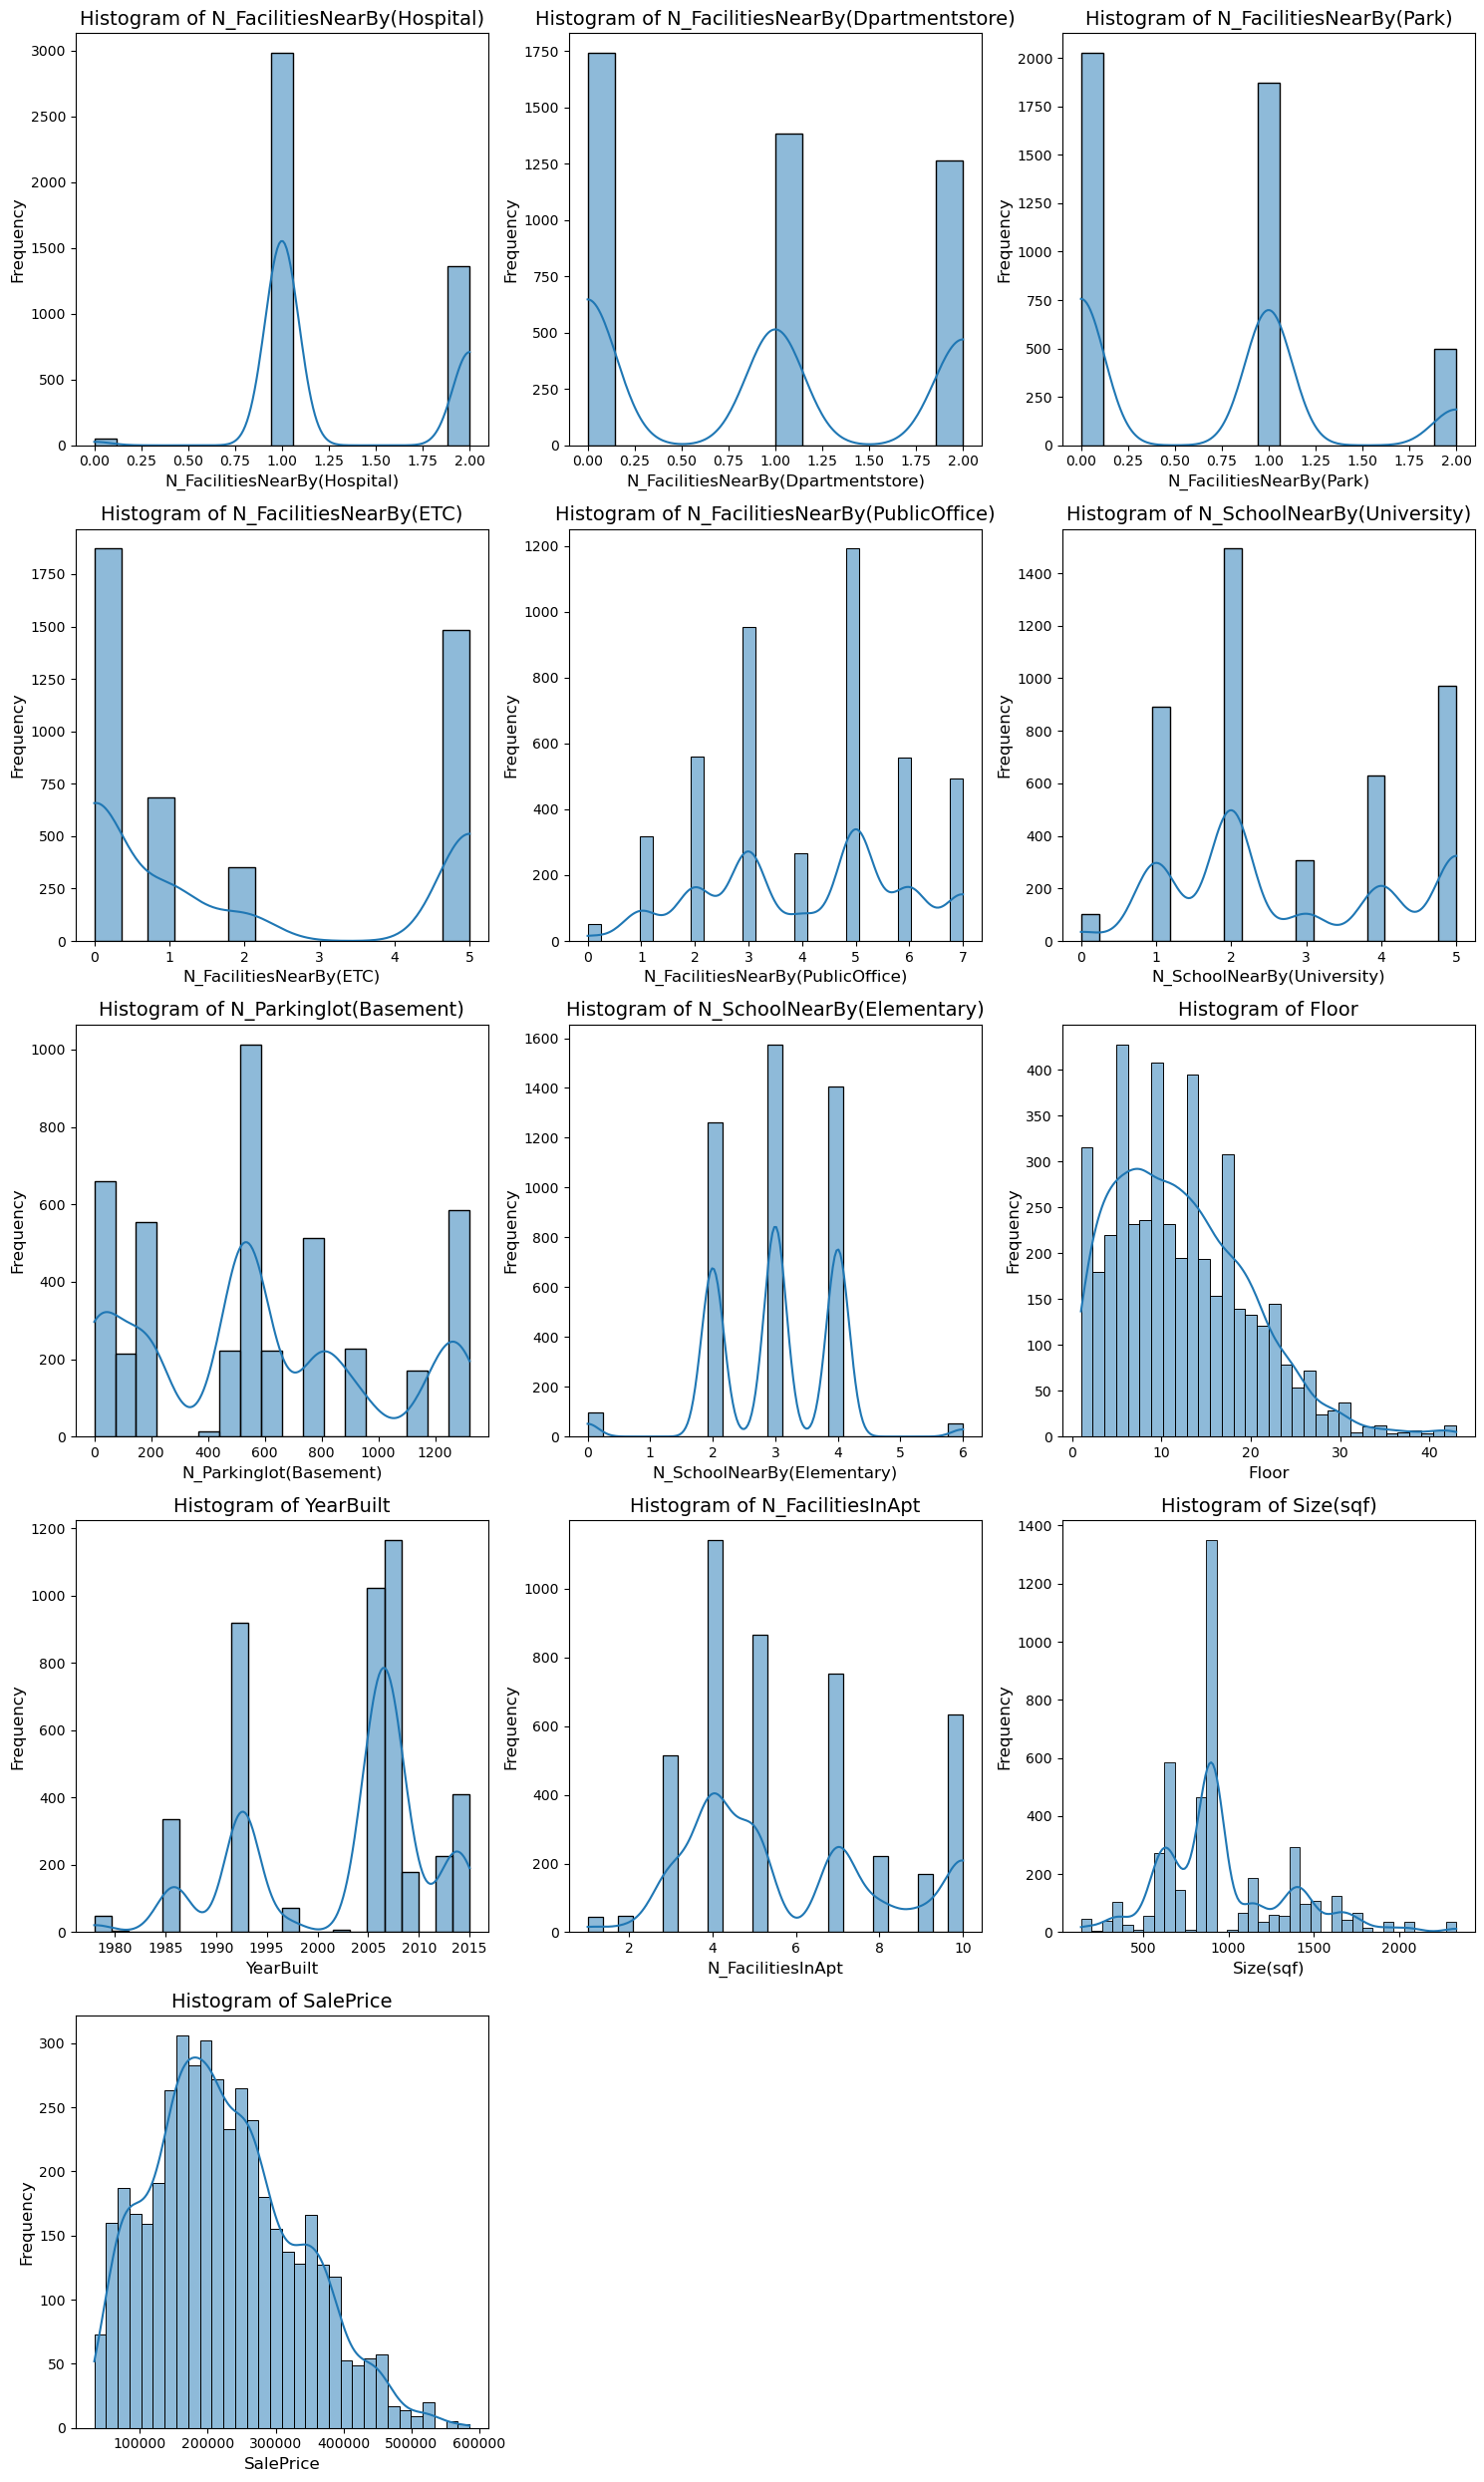

In [116]:
import math
# Determine the number of subplots needed
num_features = len(numerical_columns_list)
cols = 3
rows = math.ceil(num_features / cols)

# Set up the figure size (adjusted for dynamic rows)
plt.figure(figsize=(15, 5 * rows))

# Loop through each feature in the numerical columns list
for i, feature in enumerate(numerical_columns_list, 1):
    # Create a subplot for each feature
    plt.subplot(rows, cols, i)
    
    # Plot the histogram with a kernel density estimate (KDE)
    sns.histplot(merge[feature], kde=True)
    
    # Set the title and labels for each subplot
    plt.title(f'Histogram of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

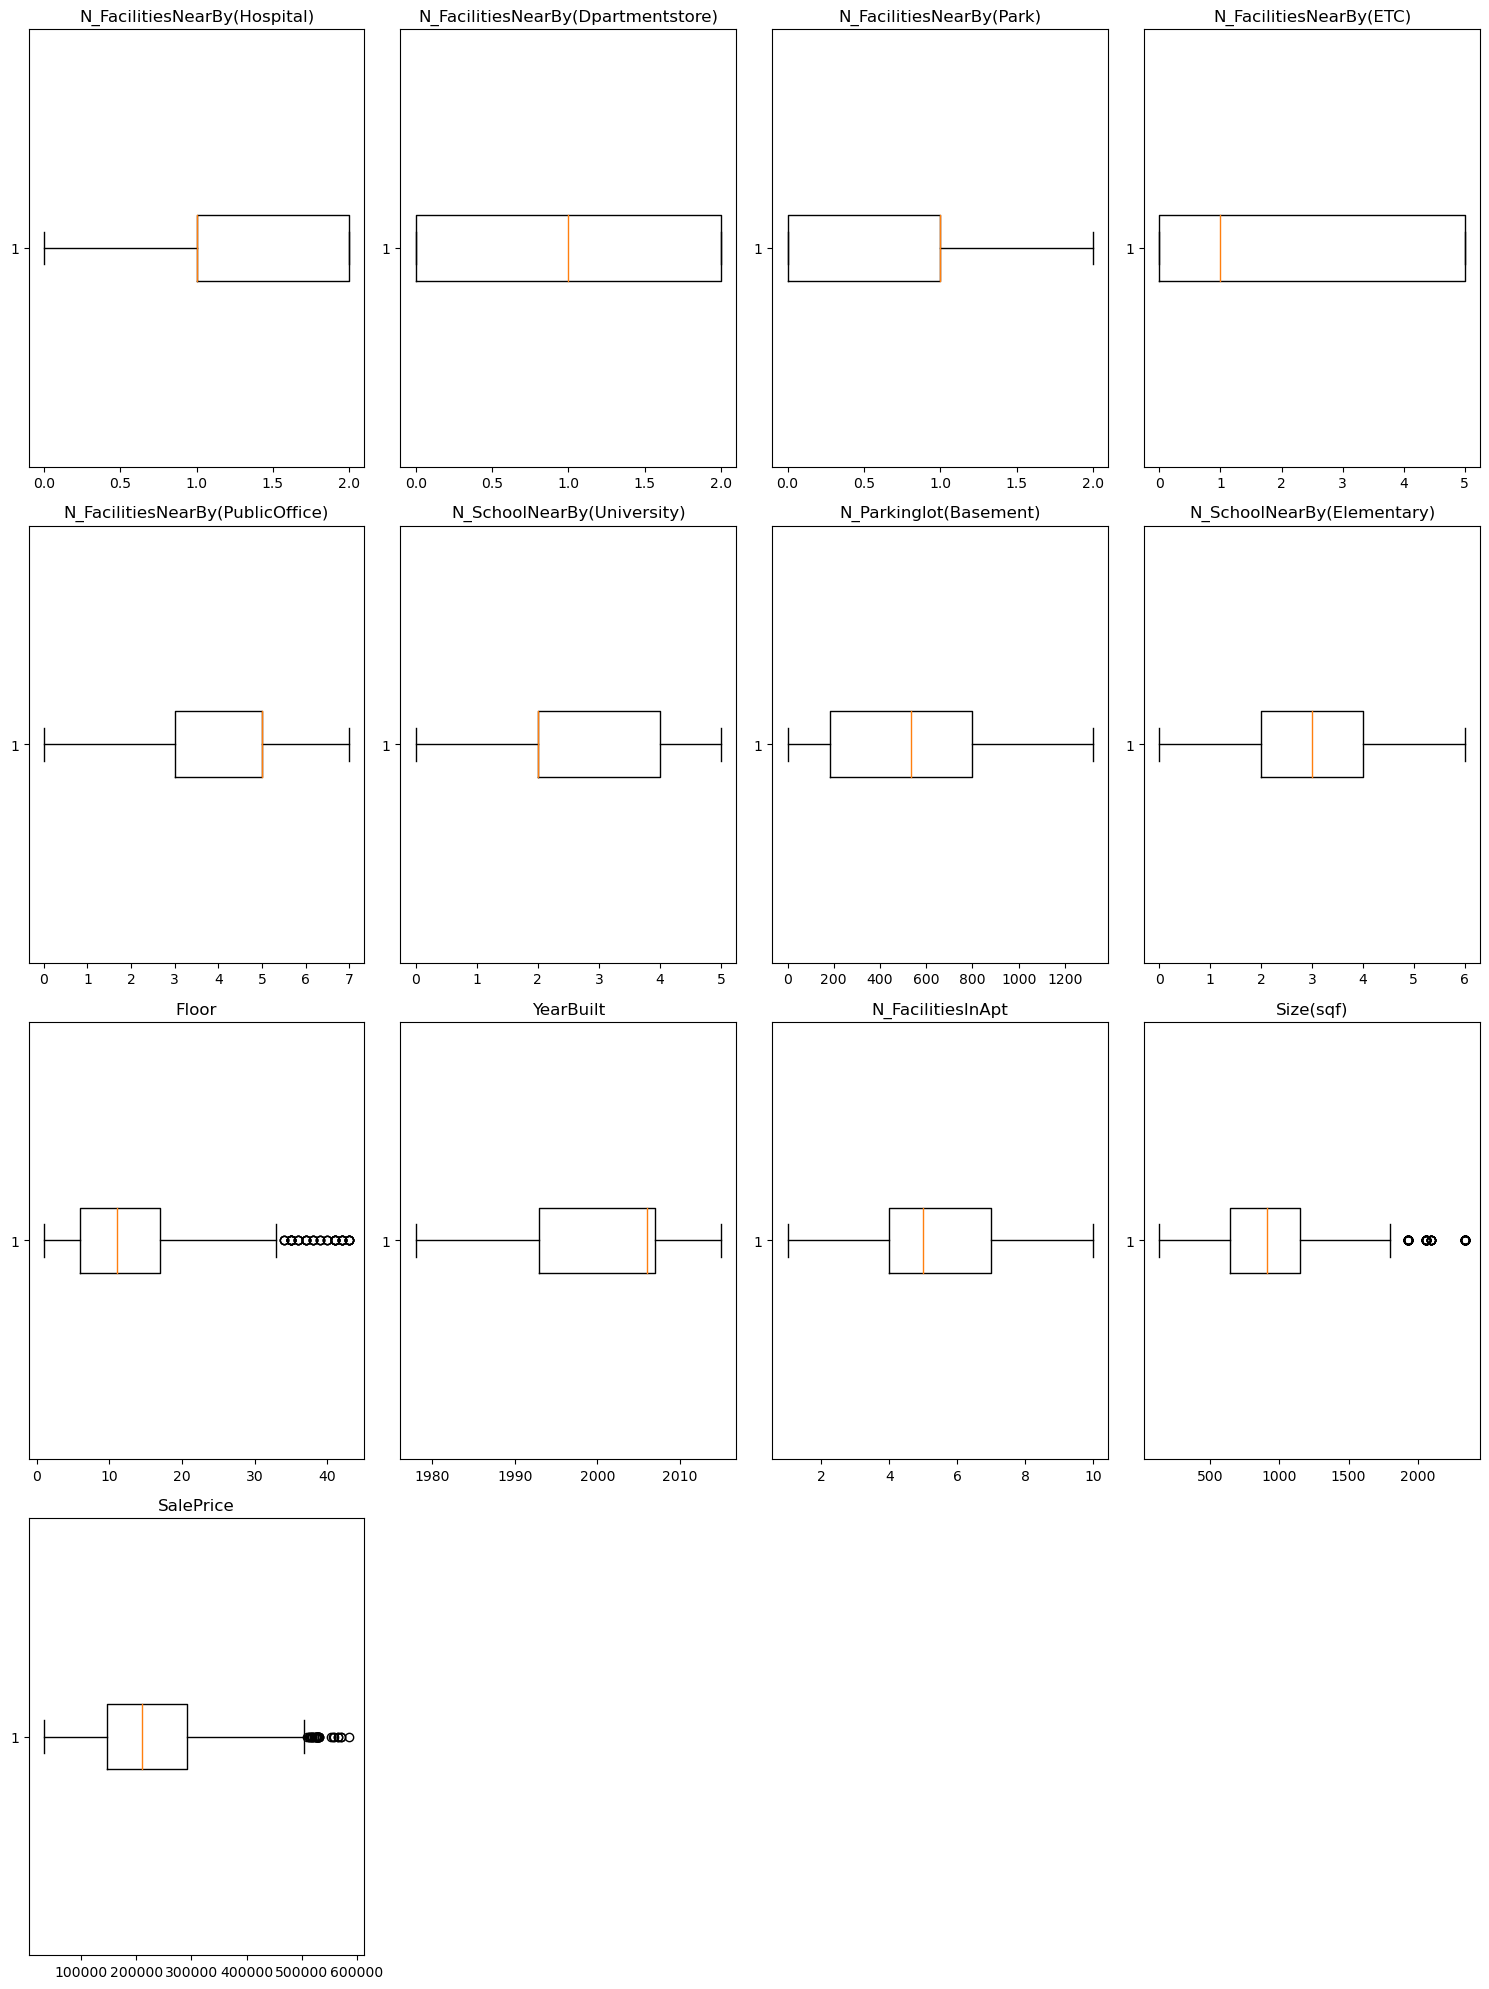

In [117]:
import numpy as np

# Determine the number of rows and columns needed
n_cols = 4
n_rows = int(np.ceil(len(numerical_columns_list) / n_cols))

plt.figure(figsize=(15, n_rows * 5))

for i, feature in enumerate(numerical_columns_list):
    plt.subplot(n_rows, n_cols, i + 1)
    try:
        plt.boxplot(merge[feature], vert=False)
        plt.title(feature)
    except KeyError:
        print(f"Column '{feature}' not found in merge")

plt.tight_layout()
plt.show()

#### **Hasil Outlier Checking**
Kita dapatkan bahwa 2 independent fitur memiliki outlier, yaitu Floor dan Size(sqf). Sehingga, 2 fitur ini akan kita lakukan teknik untuk handling outlier menggunanakan `Winsorization`.


### **Cek Multicolliniearity**

Pada tahap ini kita lakukan uji korelasi untuk mengukur kekuatan antar fitur menggunakan method spearman karena tidak distribusi features tidak normal.

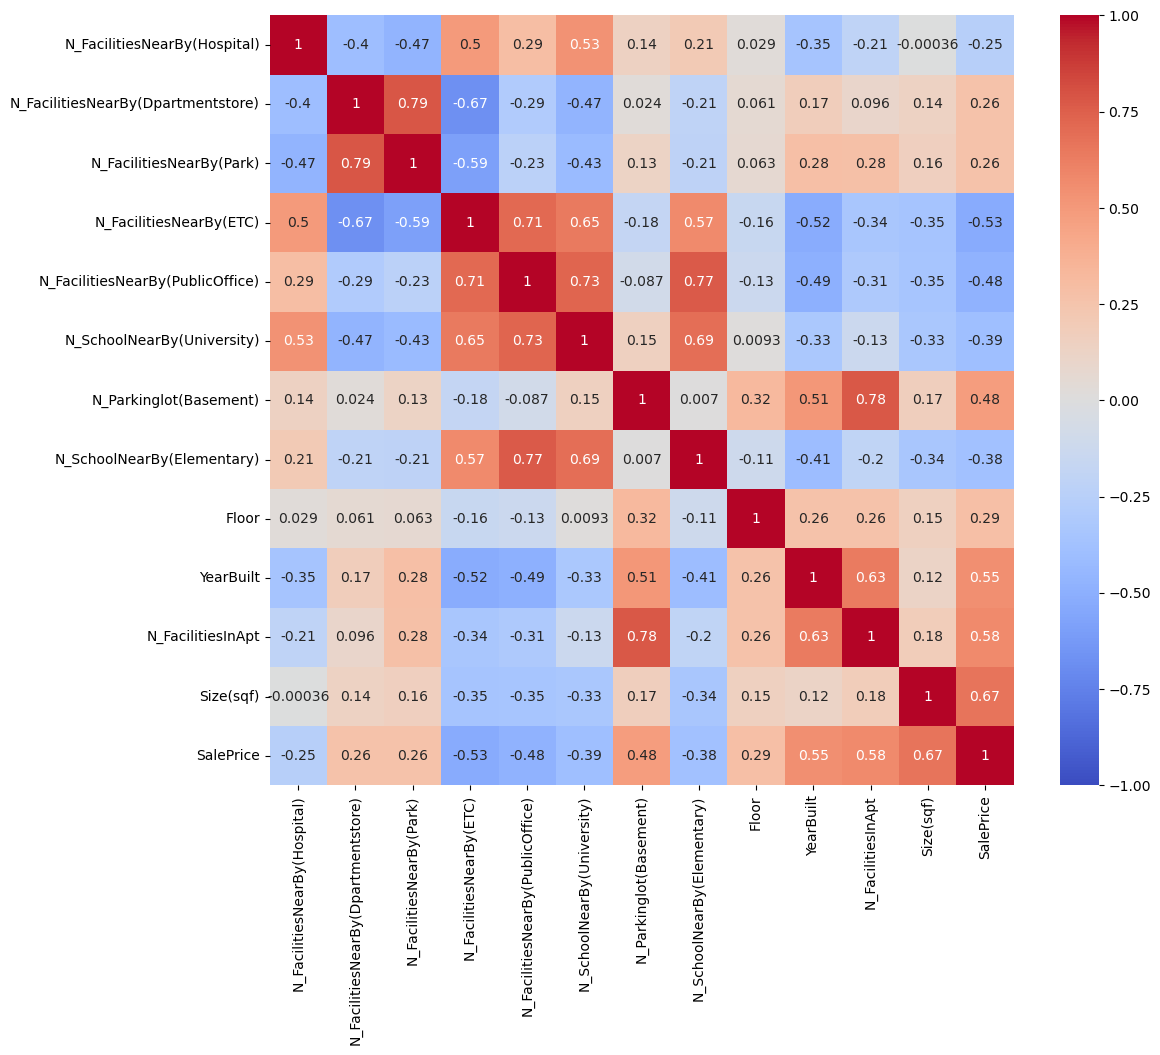

In [118]:
correlation_matrix = merge[numerical_columns_list].corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap    ='coolwarm', vmin=-1, vmax=1)
plt.show()

In [119]:
# Print Fitur-fitur yang berkorelasi tinggi
# Setting a threshold for high correlation
high_corr_threshold = 0.8

# Finding pairs of highly correlated features
high_corr_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns 
                   if i != j and abs(correlation_matrix.loc[i, j]) > high_corr_threshold]

print("Highly correlated pairs:")
for pair in high_corr_pairs:
    print(pair)

Highly correlated pairs:


Dari hasil ini tidak terdapat `pair-features` yang melebihi threshold, namun tingkat korelasi ini tetap perlu dikonsiderasi dan menurut [Simon Fraser University, CHAPTER 8: MULTICOLLINEARITY](https://www.sfu.ca/~dsignori/buec333/lecture%2016.pdf)
* Rule of thumb yang bisa digunakan adalah jika nilai correlation > 0.8 maka dapat dikatakan **severe multicollinearity may be present**. Sehingga, kita dapat lakukan handling seperti drop salah satu column jika diperlukan.

## **Modeling / Training model**

Pada tahap ini kita coba melatih model dengan 2 pendekatan:

1. Baseline Model.
2. Comparing other regression model.

In [120]:
# Import modul-modul yang dibutuhkan untuk splitting data, preprocess, models, dan scoring evaluasi.
from sklearn.model_selection import train_test_split, cross_val_score,learning_curve
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer


In [121]:
# Hapus SalePrice dari list karena berupa target variable
numerical_columns_list.pop()
numerical_columns_list

['N_FacilitiesNearBy(Hospital)',
 'N_FacilitiesNearBy(Dpartmentstore)',
 'N_FacilitiesNearBy(Park)',
 'N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'N_SchoolNearBy(Elementary)',
 'Floor',
 'YearBuilt',
 'N_FacilitiesInApt',
 'Size(sqf)']

In [122]:
# Import winsorize untuk handling outlier pada 2 fitur Floor dan Size(sqft) pada data train.
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin

In [123]:
# Persiapkan class untuk handling data train
class Cleaning(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        # HANDLING NUMERICAL COLUMNS OUTLIERS 
        # --------------------------------------
        # Penerapan Winsorization
        X['Size(sqf)'] = winsorize(X['Size(sqf)'], limits=[0, 0.04])
        X['Floor'] = winsorize(X['Floor'], limits=[0, 0.02])

        return X.to_numpy()

In [124]:
# Pisahkan fitur dan target variable
X = merge.drop('SalePrice', axis=1)
y = merge['SalePrice']

# Split data menjadi training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Persiapkan Pipeline untuk preprocessing
# Kelompokkan categorical dan numerical columns
cat_features = categorical_columns_list
num_features = numerical_columns_list
cleaning_features = ['Floor','Size(sqf)']

# Preprocessing pipelines untuk numerical and categorical data
numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
    ('cleaning', Cleaning(), cleaning_features),    
    ('num', numerical_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
])


### **Baseline Model**

Pada tahap ini kita latih gunakan model yang paling sederhana untuk menjadi baseline model dari project regressi predictive modelling ini.
* Hasil dari kemampuan `baseline model Linear Regression` dalam memprediksi data test adalah :
    * **MAE** : 37291 Won
    * **R2** : 0.80%

In [125]:
# Baseline model: Linear Regression
linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = linear_model.predict(X_train)

# Predict on the test set
y_test_pred = linear_model.predict(X_test)

# Print performance metrics
print('Linear Regression Performance:')
print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')
print(f'Test R2: {r2_score(y_test, y_test_pred)}')

Linear Regression Performance:
Test MAE: 37291.430158800365
Test MSE: 2122082126.3879719
Test R2: 0.8065613833633531


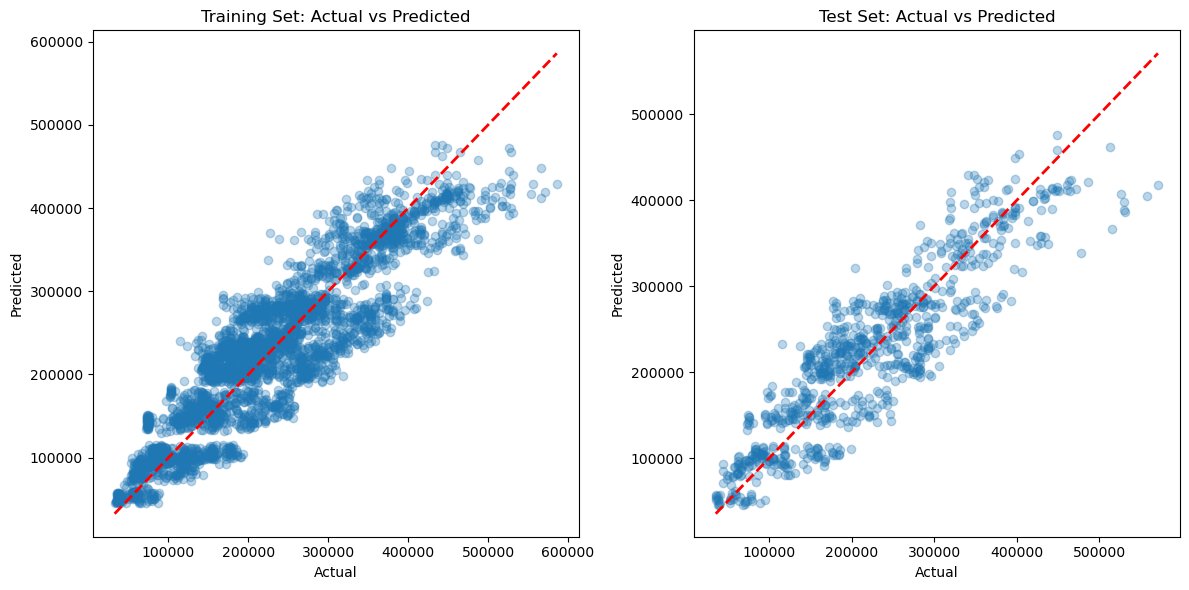

In [126]:
# Plot actual vs predicted for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs Predicted')

# Plot actual vs predicted for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

**General Insights** :
* **Performa Model**: Model linear regression bekerja baik pada data latihan, dengan akurasi tinggi dan hanya sedikit outlier yang signifikan. Pada data pengujian, performanya masih baik, tetapi dengan sedikit peningkatan dalam kesalahan prediksi.
* **Potensi Overfitting**: cluster yang lebih ketat pada data latihan dibandingkan dengan data uji menunjukkan potensi overfitting, di mana model menangkap pola data train dengan sangat baik tetapi tidak menggeneralisasi seefektif mungkin pada data baru yang tidak terlihat.

#### **Learning Curve/Kurva Belajar Baseline model: Linear Regression**

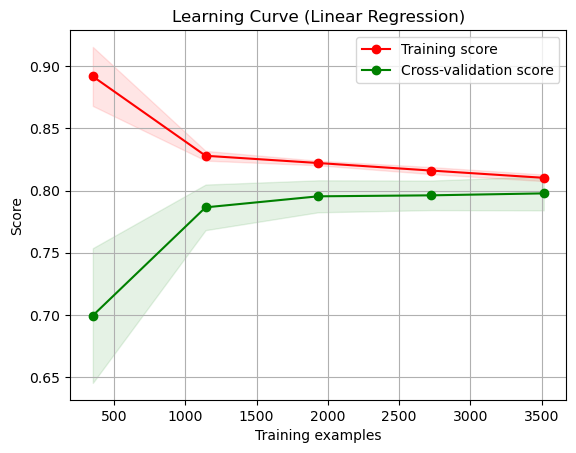

In [127]:
# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(linear_model, "Learning Curve (Linear Regression)", X, y, cv=5, n_jobs=-1)
plt.show()

Ada 3 hal yang bisa kita interpretasikan dari kurva belajar **R2** ini :
* Training Score: model `terjadi overfitting` pada data latihan saat data masih sedikit `tetapi menjadi lebih representatif` seiring bertambahnya data.
* Cross-validation Score : model belajar lebih baik dan `generalisasi meningkat` dengan `lebih banyak data pelatihan` karena skor cross-validation meningkat saat jumlah contoh data pelatihan bertambah, kemudian mendatar.
* Perbedaan Skor: 
    * skor latihan dan cross-validation menunjukkan adanya overfitting. Namun, perbedaan ini menurun seiring bertambahnya data pelatihan. 
    * Ketika garis mendekati satu sama lain, itu menunjukkan bahwa model menjadi lebih seimbang dan tidak overfitting atau underfitting.

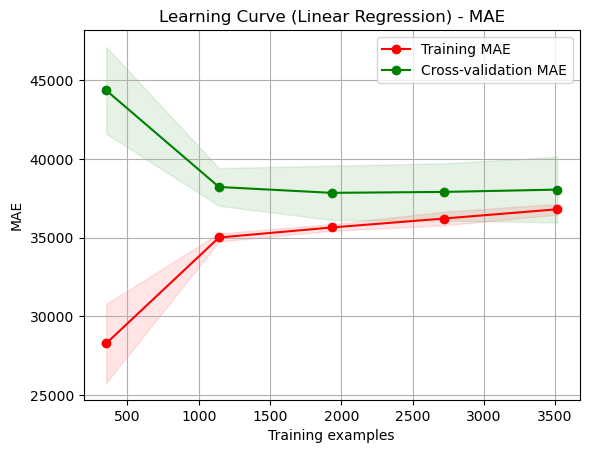

In [128]:
# Function to plot learning curve for MAE
def plot_learning_curve_mae(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("MAE")
    
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=mae_scorer)
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MAE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation MAE")
    
    plt.legend(loc="best")
    return plt

# Plot the learning curve for MAE
plot_learning_curve_mae(linear_model, "Learning Curve (Linear Regression) - MAE", X, y, cv=5, n_jobs=-1)
plt.show()

MAE cross-validation menurun saat jumlah contoh data pelatihan bertambah, kemudian stabil. Ini menunjukkan bahwa model menjadi lebih akurat dan mampu memprediksi lebih baik pada data yang tidak terlihat `saat lebih banyak data pelatihan digunakan`.

**Insights** untuk baseline model adalah :
* Overfitting: Model awalnya menunjukkan overfitting dengan performa pelatihan yang jauh lebih baik daripada cross-validation, terutama dengan data pelatihan yang kecil.
* Generalization: Dengan bertambahnya data pelatihan, model menjadi lebih baik dalam generalisasi, yang terlihat dari mendekatnya skor pelatihan dan cross-validation, serta penurunan MAE.
* `Rekomendasi`: Menambahkan lebih banyak data pelatihan cenderung membantu model belajar lebih baik dan mengurangi overfitting.

### **Komparasi Beberapa Model Regressi untuk Hasil/Performa Terbaik**

Terdapat 13 Model (termasuk baseline model) untuk komparasi dengan 2 metrik evaluasi yaitu, **R2** dan **MAE**.

In [129]:
# List of regression models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Lasso Regression', ElasticNet()),
    ('Bayesian Ridge Regression', BayesianRidge()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Extra Tree Regression', ExtraTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('AdaBoost Regression', AdaBoostRegressor()),
    ('Bagging Regression', BaggingRegressor()),
    ('KNeighbors Regression', KNeighborsRegressor()),
    ('Support Vector Regression', SVR())
]

c:\Users\Fariz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.759e+12, tolerance: 3.965e+09
  model = cd_fast.enet_coordinate_descent(


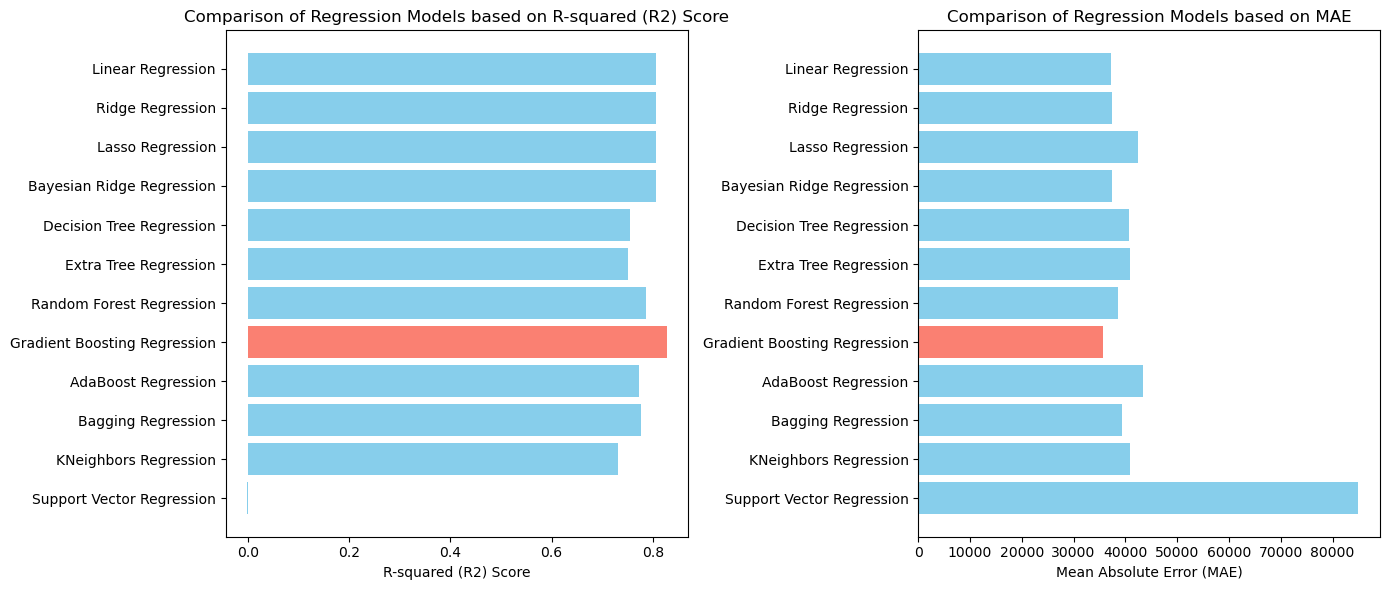

In [130]:
# Lists to store model names, R2 scores, and MAE values
model_names = []
r2_scores = []
mae_values = []

# Train and evaluate setiap model
for name, model in models:
    # Create pipeline with preprocessing and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append model name, R2 score, and MAE to the lists
    model_names.append(name)
    r2_scores.append(r2)
    mae_values.append(mae)

# Ambil index of the model with the lowest MAE and highest R2
lowest_mae_index = mae_values.index(min(mae_values))
highest_r2_index = r2_scores.index(max(r2_scores))

# Buat bar plot for R2 scores and MAE values
plt.figure(figsize=(14, 6))

# R2 Score Plot
plt.subplot(1, 2, 1)
r2_colors = ['skyblue'] * len(models)
r2_colors[highest_r2_index] = 'salmon'  
plt.barh(model_names, r2_scores, color=r2_colors)
plt.xlabel('R-squared (R2) Score')
plt.title('Comparison of Regression Models based on R-squared (R2) Score')
plt.gca().invert_yaxis() 

# MAE Plot
plt.subplot(1, 2, 2)
mae_colors = ['skyblue'] * len(models)
mae_colors[lowest_mae_index] = 'salmon' 
plt.barh(model_names, mae_values, color=mae_colors)
plt.xlabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Regression Models based on MAE')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

In [131]:
for i in range(len(model_names)):
    print(f"{model_names[i]} : {r2_scores[i]}")
print()
print(f"Best model: {model_names[highest_r2_index]}")
print(f"Max score R2: {max(r2_scores)}")
print(f"Lowest MAE: {min(mae_values)}")

Linear Regression : 0.8065613833633531
Ridge Regression : 0.8058213603914008
Lasso Regression : 0.8065755252939899
Lasso Regression : 0.7691967231452796
Bayesian Ridge Regression : 0.806302048128651
Decision Tree Regression : 0.7557979024235366
Extra Tree Regression : 0.751619371563983
Random Forest Regression : 0.787448716042634
Gradient Boosting Regression : 0.8273230079060956
AdaBoost Regression : 0.7725138828290395
Bagging Regression : 0.7768148641110778
KNeighbors Regression : 0.7316104559089148
Support Vector Regression : -0.0030810419221127816

Best model: Gradient Boosting Regression
Max score R2: 0.8273230079060956
Lowest MAE: 35665.430962421015


#### **Hasil Komparasi Model**

Dari hasil komparasi model diatas, kita dapatkan model terbaik yaitu `Gradient Boosting Regression` dengan performa sebagai berikut :
* **R2** : 0.82%
* **MAE** : 35653 Won

Gradient Boosting Regression sebagai **Ensemble Model** mampu memberikan performa yang paling baik dalam kemampuan generalisasi dibandingkan dengan model-model yang lain. 

## Hyperparameter Tuning

Hyperparameter Tuning merupakan teknik dalam machine learning untuk melakukan perubahan nilai-nilai pada paramter suatu algoritma atau model dengan tujuan melihat apakah dapat terjadi peningkatan kemampuan model dibanding dengan nilai default nya. Pada tahap sebelumnya kita telah mendapat model terbaik yaitu `Gradient Boosting Regression`, sehingga model inilah yang akan kita **Tuning** dan melihat apakah dapat terjadi peningkatan yang signifikan.

Metode yang digunakan adalah 2 skenario, yaitu fast dan mid. Tujuan nya adalah efisiensi waktu dan melihat perubahan secara bertahap.

`Langkah kerja` yang akan kita lakukan adalah : 
1. Menyiapkan 2 skenario nilai parameter.
2. Menggunakan `GridSearchCV` untuk mencoba semua kombinasi dan cek `stability`.
3. Cek Overfitting melalui Performa di `Train and Test data` pada metrik `MAE` dan `R2`.

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
param_grid_fast = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 4]
}

param_grid_mid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

# Pilih GradientBoostingRegressor sebagai model
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor())
    ])

# Pembuatan function to perform grid search and print results
def perform_grid_search(param_grid, scenario):
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters ({scenario}):", grid_search.best_params_)
    print(f"Best R2 score ({scenario}):", grid_search.best_score_)

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Training performance untuk melihat hasil pada training phase
    y_train_pred = best_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Test performance untuk melihat hasil pada testing phase
    y_test_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"Training R2 ({scenario}):", train_r2)
    print(f"Training MAE ({scenario}):", train_mae)
    print(f"Test R2 ({scenario}):", test_r2)
    print(f"Test MAE ({scenario}):", test_mae)
    print("\n")

# Perform grid search for each scenario
perform_grid_search(param_grid_fast, "Fast")
perform_grid_search(param_grid_mid, "Mid")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters (Fast): {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Best R2 score (Fast): 0.8349145462529666
Training R2 (Fast): 0.8479985284390368
Training MAE (Fast): 33286.845655758734
Test R2 (Fast): 0.8274466289658204
Test MAE (Fast): 35657.945381737925


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters (Mid): {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Best R2 score (Mid): 0.8349649011987752
Training R2 (Mid): 0.8479985284390368
Training MAE (Mid): 33286.845655758734
Test R2 (Mid): 0.8273839977218971
Test MAE (Mid): 35656.913062746935




### **Hasil Hyperparameter Tuning** 
Setelah kita lakukan 2 skenario diatas kita dapatkan `Best Parameter after Hyperparameter` Tuning Gradient Boosting Regressor, yaitu :
* **learning_rate** : 0.1
* **model__max_depth** : 3
* **model__n_estimators** : 100

Perbandingan **Before** and **After** Hyperparameter Tuning tidak menunjukkan perubahan hasil yang signifikan, hal ini dapat dijelaskan dengan cara kerja dari Gradient Boosting Regression itu sendiri dan `default value` untuk parameternya sehingga telah mampu untuk mencapai kemampuan generalisasi yang cukup baik.

## **Interpretasi/Explainability Model Menggunakan Metode SHAP (SHapley Additive exPlanations)**



In [134]:
import shap

### **Cara kerja Gradient Boosting Regressor**

Gradient boosting (tree-based) merupakan algoritma machine learning yang cukup populer dan merupakan salah satu jenis `ensemble learning`, digunakan pada masalah regressi dan klasifikasi. Gradient Boosting bekerja dengan cara `sequential/berurutan`, yaitu setiap `model baru dilatih` dengan `meminimalkan` `fungsi kerugian` seperti MSE atau cross-entropy dari model sebelumnya menggunakan `penurunan gradien`.

4 konsep penting :
1. Loss function/fungsi kerugian : parameter yang ingin dikurangi hingga mendapat nilai `global minima` 
2. Weak lerner : model sederhana yaitu decision tree biasa.
3. Additive model : Secara iteratif, waek learner satu per satu ditambahkan, dimana model baru memperbaiki kesalahan model sebelumnya.
4. Shrinkage : Regularisasi pada gradient boosting. Sering disebut `learning rate`. Shrinkage mengecilkan langkah yang diambil oleh setiap weak learner `dalam memperbaiki kesalahan` model saat ini.

### **Finalize Gradient Boosting Regressor with the best hyperparameter**

In [135]:
# Define the pipeline with the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model performance
# Performance on the train set
y_train_pred = pipeline.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Performance on the test set
y_test_pred = pipeline.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Train R^2: {train_r2}")
print(f"Train MAE: {train_mae}")
print(f"Test R^2: {test_r2}")
print(f"Test MAE: {test_mae}")

Train R^2: 0.8479985284390368
Train MAE: 33286.845655758734
Test R^2: 0.8275778648232492
Test MAE: 35639.125892909586


### **Learning Curve of Gradient Boosting Regressor**

Quoting dari [Sklearn: Documentation Learning Curve](https://scikit-learn.org/stable/modules/learning_curve.html), `It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error`.

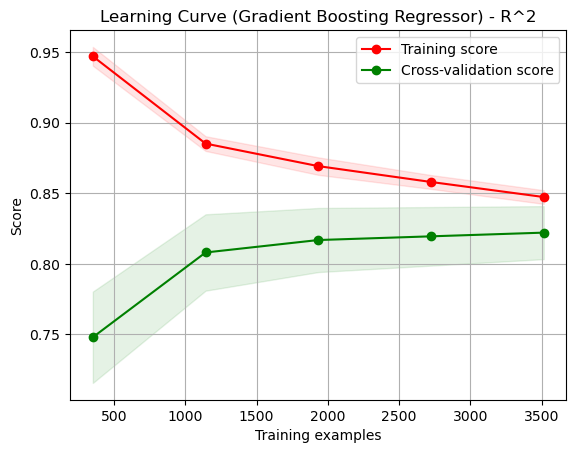

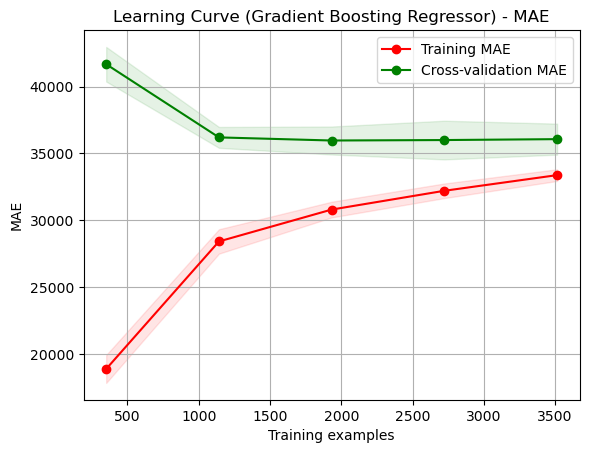

In [136]:
# Plot the learning curve for R^2
plot_learning_curve(pipeline, "Learning Curve (Gradient Boosting Regressor) - R^2", X, y, cv=5, n_jobs=-1)
plt.show()

# Plot the learning curve for MAE
plot_learning_curve_mae(pipeline, "Learning Curve (Gradient Boosting Regressor) - MAE", X, y, cv=5, n_jobs=-1)
plt.show()

**Insights** untuk best model (Gradient Boosting Regression) adalah :
* Overfitting: pada pelatihan awal terjadi overfit namun seiring bertambahnya data latihan membuat gap semakin mengecil dikarenakan naiknya skor cross-validation.
* Generalization: Dengan bertambahnya data pelatihan, model menjadi lebih baik dalam generalisasi, yang terlihat dari mendekatnya skor pelatihan dan cross-validation, dengan tetap memperhatikan garis MAE yang masih berpotensi naik.
* `Rekomendasi`: Menambahkan lebih banyak data pelatihan dapat membantu model belajar lebih baik, mengurangi overfitting dan mencapai stabilitas performa.

In [141]:
# Function to get feature names from ColumnTransformer
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'num':
            feature_names.extend(columns)
        elif name == 'cat':
            # get feature names from onehotencoder
            ohe = transformer.named_steps['onehot']
            ohe_feature_names = ohe.get_feature_names_out(columns)
            feature_names.extend(ohe_feature_names)

    return feature_names

# Extract feature names
feature_names = get_feature_names(preprocessor)

# Create a SHAP explainer
explainer = shap.Explainer(pipeline.named_steps['model'], feature_names=feature_names)  

In [142]:
# Ambil hasil transformasi dari data X_train
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_preprocessed = preprocessor.transform(X_train)

# Now you can access the preprocessed X_train
print(X_train_preprocessed)

[[1.700e+01 6.440e+02 1.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [2.000e+00 9.140e+02 1.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [4.000e+00 1.412e+03 0.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 ...
 [3.000e+00 8.680e+02 0.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [7.000e+00 6.440e+02 1.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [9.000e+00 9.030e+02 1.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]]


### **Menggunakan Beeswarm plot dan Dependance plot in SHAP untuk mengetahui contibusi masing-masing fitur** 

Plot ini bisa digunakan untuk highlight hubungan yang penting. Fitur mana yang memiliki large positive atau large negative dari SHAP values.
Kita akan menggunakan 2 plot:
1. Beeswarm Plot
2. Dependece Plot

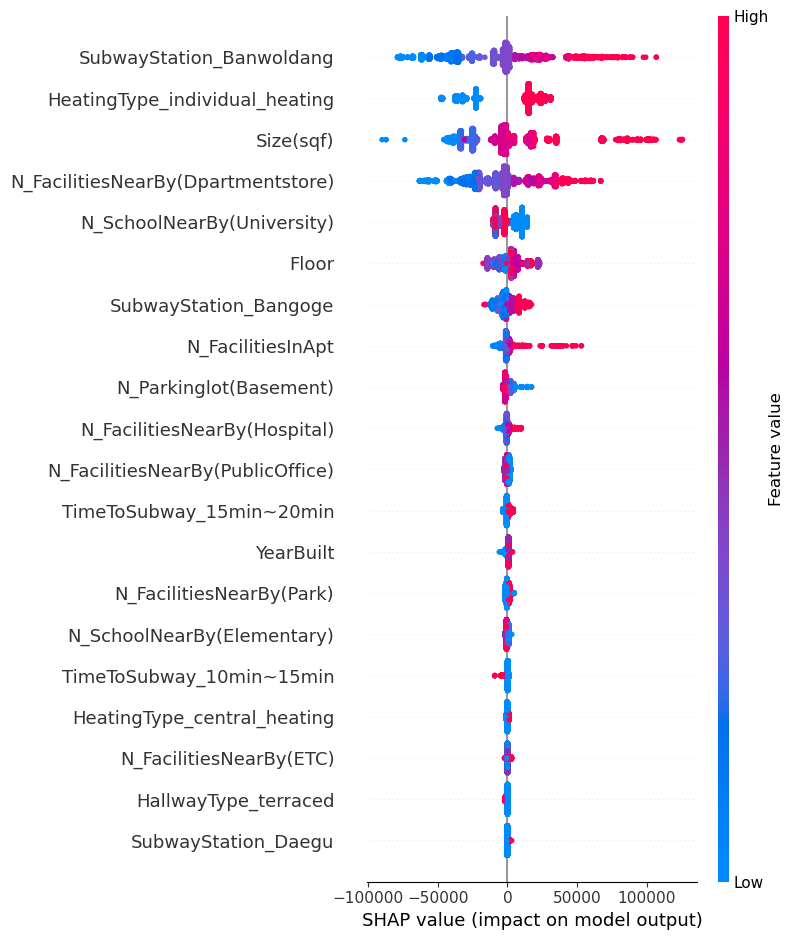

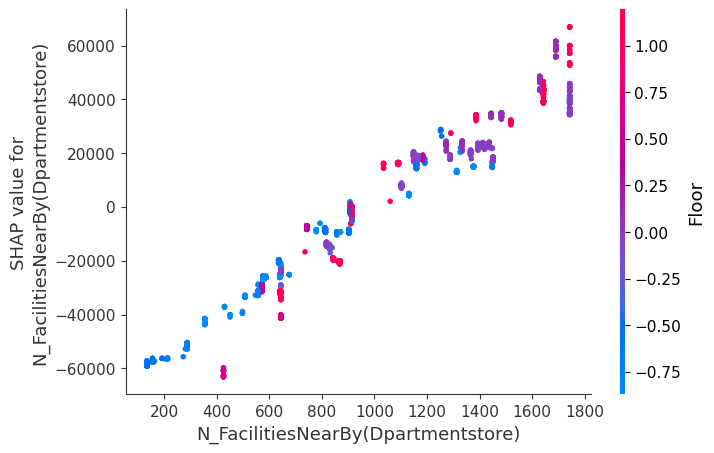

In [152]:
# Create a SHAP explainer
explainer = shap.Explainer(pipeline.named_steps['model'], X_train_preprocessed, feature_names=feature_names)

# Compute SHAP values
shap_values = explainer(X_train_preprocessed)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_train_preprocessed, feature_names=feature_names)

# SHAP dependence plot for a specific feature (e.g., first feature)
shap.dependence_plot(1, shap_values.values, X_train_preprocessed, feature_names=feature_names)

### **Interpretasi Beeswarm and Dependence SHAP Plot**

1. **Beeswarm Plot**:
* SubwayStation_Banwoldang: Nilai tinggi (merah) memiliki dampak positif pada output model, sementara nilai rendah (biru) memiliki dampak negatif.
* HeatingType_individual_heating: Fitur ini memiliki dampak yang bervariasi; nilai tinggi (merah) dapat meningkatkan atau menurunkan prediksi.
* Size(sqf): Ukuran yang lebih besar (merah) umumnya meningkatkan prediksi, sedangkan ukuran yang lebih kecil (biru) menguranginya.
* N_FacilitiesNearBy(Dpartmentstore): Nilai yang lebih tinggi (merah) terkait dengan nilai SHAP yang lebih tinggi, menunjukkan bahwa lebih banyak fasilitas di sekitar umumnya meningkatkan prediksi.

    * `Ide Dasar dari SHAP plot Beeswarm`:
    * Feature Importance : 
        * Top features adalah SubwayStation_Banwoldang, HeatingType_individual_heating, Size(sqf), and N_FacilitiesNearBy(Dpartmentstore) adalah fitur-fitur yang paling penting.
    * SHAP Values (x-axis) : Menunjukkan dampak setiap fitur pada prediksi model.
        * Nilai SHAP Positif: Fitur dengan nilai SHAP positif mendorong prediksi lebih tinggi.
        * Nilai SHAP Negatif: Fitur dengan nilai SHAP negatif mendorong prediksi lebih rendah.
    * Warna: Mewakili nilai fitur (dari rendah dalam warna biru hingga tinggi dalam warna merah).
        * Dampak Fitur: Jika nilai tinggi dari fitur (merah) terkait dengan nilai SHAP tinggi, ini berarti nilai tinggi dari fitur ini meningkatkan output model.
        * Arah Dampak: Sebaliknya, jika nilai rendah dari fitur (biru) terkait dengan nilai SHAP negatif, ini berarti nilai rendah dari fitur ini mengurangi output model.
        
2. **Dependece Plot**:     

* Tren: Seiring bertambahnya jumlah toko serba ada di sekitar, nilai SHAP juga meningkat, menunjukkan dampak positif pada prediksi.
* Interaksi dengan Floor:
    * Pada nilai rendah dari N_FacilitiesNearBy(Dpartmentstore), kita melihat campuran warna, menunjukkan bahwa Floor memiliki dampak yang bervariasi.
    * Seiring meningkatnya nilai N_FacilitiesNearBy(Dpartmentstore), kita melihat lebih banyak warna merah dan ungu, menunjukkan lantai yang lebih tinggi terkait dengan nilai SHAP yang lebih tinggi.

### **Interpretasi Gabungan:**
1. **SubwayStation_Banwoldang:** Semakin dekat dengan stasiun kereta bawah tanah ini secara signifikan meningkatkan prediksi. Ini bisa berarti properti dekat stasiun ini lebih bernilai.
2. **HeatingType_individual_heating:** Fitur ini memiliki dampak yang kompleks, mungkin karena preferensi atau biaya yang bervariasi terkait dengan jenis pemanas yang berbeda.
3. **Size(sqf):** Properti yang lebih besar cenderung memiliki prediksi yang lebih tinggi, sesuai harapan.
4. **N_FacilitiesNearBy(Dpartmentstore):** Properti yang dekat dengan toko serba ada memiliki prediksi yang lebih tinggi, menunjukkan kenyamanan yang lebih tinggi dan potensi nilai yang lebih tinggi.
5. **Interaksi antara Floor dan N_FacilitiesNearBy(Dpartmentstore):** Lantai yang lebih tinggi dikombinasikan dengan lebih banyak toko serba ada di sekitar menghasilkan prediksi yang lebih tinggi, menunjukkan premi gabungan untuk fitur-fitur ini.

## **Finalize and save Model**

Berdasarkan **Jason Brownlee PhD** [How to Finalize a Model](https://machinelearningmastery.com/train-final-machine-learning-model/), kita finalisasi sebuah model dengan melatihnya dengan semua data tersedia untuk mendapatkan maximum benefit dari model kita buat.

In [96]:
import joblib

In [97]:
# Save Model
file_path = 'D:\Purwadhika\capstone-project-3/finalized_model.pkl'

In [98]:
# Persiapkan untuk finalize model
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('model', GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100))
])

# Train the model on all available data
pipeline.fit(X, y)

# Save the finalized model
joblib.dump(pipeline, file_path)

print("Model finalized and saved successfully!")

Model finalized and saved successfully!


In [48]:
# Save train and test data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_file_path = 'D:\Purwadhika\capstone-project-3/train_data.csv'
test_file_path = 'D:\Purwadhika\capstone-project-3/test_data.csv'

train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

## **Conclusion**

1. **Ringkasan Proyek:**
Proyek ini bertujuan untuk memprediksi harga properti berdasarkan berbagai fitur seperti ukuran, lokasi, fasilitas di sekitar dan lain sebagainya. Dataset yang digunakan mencakup informasi detail tentang properti dari sumber terpercaya.
2. **Hasil Utama:**
Model regresi Gradient Boosting Regressor dipilih karena kemampuannya dalam menangani data non-linear dan memberikan hasil yang akurat. Model ini mencapai nilai R-squared sebesar 82.75% dan MAE sebesar 35639 pada data uji, menunjukkan kemampuan prediksi yang cukup baik dengan data yang terbatas.
3. **Insights Penting:**
Analisis SHAP menunjukkan bahwa fitur-fitur seperti SubwayStation_Banwoldang, HeatingType_individual_heating, Size(sqf), dan N_FacilitiesNearBy(Dpartmentstore) memiliki dampak signifikan pada prediksi harga properti. Misalnya, kedekatan dengan stasiun kereta bawah tanah Banwoldang dan ukuran properti adalah faktor yang paling meningkatkan nilai prediksi.
4. **Limitasi:**
Meskipun model memberikan hasil yang baik, terdapat beberapa limitasi yang perlu diperhatikan. Dataset yang digunakan mungkin tidak sepenuhnya representatif dari populasi yang lebih luas. Selain itu, model ini mungkin mengalami overfitting pada data training dan memerlukan validasi lebih lanjut pada data yang lebih bervariasi. Kompleksitas model juga menjadi tantangan dalam implementasi di aplikasi nyata.
5. **Rekomendasi:**
untuk kedepannya, disarankan untuk mengumpulkan lebih banyak data dari berbagai sumber untuk memastikan representativitas yang lebih baik. Selain itu, penggunaan teknik-teknik regularisasi dan model yang lebih sederhana mungkin diperlukan untuk mengurangi risiko overfitting. Implementasi model dalam aplikasi nyata harus memperhatikan interpretabilitas model agar hasil prediksi dapat digunakan dengan efektif oleh pemangku kepentingan non-teknis.

## **Recommended Action Berdasarkan Interpretasi:**

* **Insights Model**: Insight dari plot SHAP digunakan untuk memahami fitur mana yang paling berpengaruh dan bagaimana mereka mempengaruhi prediksi.
* **Rekayasa Fitur**: Mempertimbangkan untuk membuat fitur interaksi secara eksplisit jika model tidak menangkapnya secara efektif.
* **Peningkatan Model**: Memvalidasi insight dengan memeriksa apakah pola-pola tersebut masuk akal berdasarkan `domain knowledge`, dan mempertimbangkan untuk memasukkan fitur atau interaksi tambahan jika diperlukan.

## **Limitasi Model**

Limitasi model menggambarkan bagaimana model dilatih data batasan :
* Data:

    * Dataset yang digunakan dalam proyek ini berasal dari satu sumber dan tidak mencakup variasi yang lebih luas dari populasi target. Hal ini dapat membatasi kemampuan model untuk digeneralisasi ke populasi yang berbeda.

    * Terdapat outlier pada beberapa fitur yang diatasi dengan winsorization sederhana. Pendekatan ini mungkin tidak menangkap pola yang lebih kompleks yang dapat mempengaruhi hasil.

* Model:
    * Model mungkin mengalami overfitting pada data training meskipun sudah dilakukan tuning hyperparameter dan cross-validation. Ini bisa menyebabkan performa yang lebih buruk pada data baru yang tidak terlihat selama training.

* Implementasi:
    * Interpretabilitas model yang rendah dapat menjadi hambatan dalam menjelaskan hasil prediksi kepada pemangku kepentingan non-teknis.      

* Keberlanjutan:
    * Model mungkin memerlukan pembaruan berkala dengan data baru untuk memastikan performa yang optimal seiring perubahan pola data dari waktu ke waktu.     
